<a href="https://colab.research.google.com/github/microhum/Comcamp36_Data_Science_Resources/blob/master/COMCAMP36_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMCAMP36 Image Processing
มาถึงในบทสุดท้ายของเรา Image Processing มาดูกันว่าคอมพิวเตอร์นั้นมองเห็นรูปภาพเป็นอะไร และเราสามารถทำอะไรกับรูปภาพได้บ้าง
- รูปภาพนั้นเป็นข้อมูลที่ได้รับความนิยมในการนำมาประยุกต์กับการใช้งานกับโมเดลแบบ Deep Learning ในการทำหลายอย่าง ไม่ว่าจะเป็น Image Classification (การจำแนกรูปภาพ) รวมไปถึง Image Generation ที่น้องๆ อาจจะเคยเห็นรูปหรือวิดิโอที่ generate มาจาก AI บ้างแล้ว

In [1]:
!gdown https://drive.google.com/uc?id=1Kl6-7m4-sEZKmYCAm9GmnTprwEpTKupQ # Download Learning Resources
!unzip -q /content/Image_Comcamp36.zip -d . # unzip ไฟล์ zip ที่ดาวน์โหลดมา

Downloading...
From (original): https://drive.google.com/uc?id=1Kl6-7m4-sEZKmYCAm9GmnTprwEpTKupQ
From (redirected): https://drive.google.com/uc?id=1Kl6-7m4-sEZKmYCAm9GmnTprwEpTKupQ&confirm=t&uuid=978c3f8d-e592-4dae-87fa-cab2b907e1fd
To: /content/Image_Comcamp36.zip
100% 76.5M/76.5M [00:02<00:00, 27.8MB/s]


In [2]:
# ติดตั้ง Pillow, FastAI (เนื่องจาก Google Colab ไม่มีติดตั้งมาให้เหมือน Numpy Pandas Matplotlib Scikit-Learn)
!pip install pillow fastai -qq # รอสักพัก

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.0 MB/s eta 0:00:00


มาลองใช้รูปห่าน มจธ. ของเราในการทดสอบกันเลย

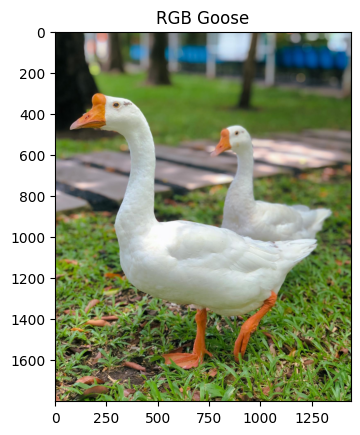

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

data_path = "/content/Image_Comcamp38"

# เปิดไฟล์รูปของห่านด้วย Pillow
image = Image.open(f"{data_path}/Goose.jpg")
image_array = np.array(image)

plt.imshow(image_array)
plt.title("RGB Goose")
plt.show()

In [7]:
print("Pixel values:\n")
image_array

Pixel values:



array([[[ 15,  21,  17],
        [ 14,  20,  16],
        [ 14,  20,  16],
        ...,
        [156, 171, 176],
        [157, 170, 176],
        [158, 171, 177]],

       [[ 15,  21,  17],
        [ 15,  21,  17],
        [ 14,  20,  16],
        ...,
        [156, 171, 176],
        [158, 171, 177],
        [158, 171, 177]],

       [[ 15,  21,  17],
        [ 15,  21,  17],
        [ 15,  21,  17],
        ...,
        [156, 171, 176],
        [158, 171, 177],
        [158, 171, 177]],

       ...,

       [[194, 116,  93],
        [196, 118,  95],
        [199, 121,  98],
        ...,
        [111, 137,  74],
        [ 78, 103,  37],
        [ 47,  72,   4]],

       [[195, 117,  94],
        [196, 118,  95],
        [198, 120,  97],
        ...,
        [115, 141,  80],
        [108, 133,  67],
        [104, 129,  61]],

       [[196, 118,  95],
        [196, 118,  95],
        [197, 119,  96],
        ...,
        [127, 153,  92],
        [128, 153,  87],
        [123, 148,  80]]

- รูปมีขนาด 1440 x 1800 (กว้าง x สูง)
- จะเห็นว่ารูปที่เป็น RGB เป็น 3D matrix โดยจะมี color channel อยู่ 3 channel ประกอบไปด้วย R, G, B

In [8]:
image_array.shape

(1800, 1440, 3)

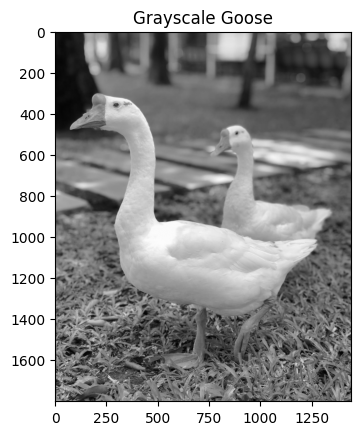

Pixel values:



array([[ 19,  18,  18, ..., 167, 167, 168],
       [ 19,  19,  18, ..., 167, 168, 168],
       [ 19,  19,  19, ..., 167, 168, 168],
       ...,
       [137, 139, 142, ..., 122,  88,  57],
       [138, 139, 141, ..., 126, 118, 114],
       [139, 139, 140, ..., 138, 138, 133]], dtype=uint8)

In [9]:
image_gray = image.convert("L")
image_gray_array = np.array(image_gray)
plt.imshow(image_gray, cmap='gray')
plt.title("Grayscale Goose")
plt.show()

print("Pixel values:\n")
image_gray_array

- รูปมีขนาดเท่าเดิมคือ 1440 x 1800 (กว้าง x สูง)
- จะเห็นว่ารูปที่เป็นขาวดำเป็น 2D matrix (channel สีแค่ 1 channel)

In [10]:
image_gray_array.shape

(1800, 1440)

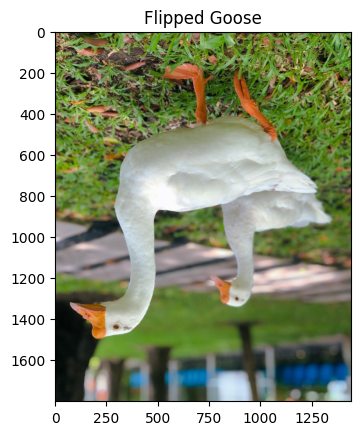

In [11]:
flipped_image_array = np.flip(image_array, axis=0)  # Flip vertically

plt.imshow(flipped_image_array)
plt.title("Flipped Goose")
plt.show()

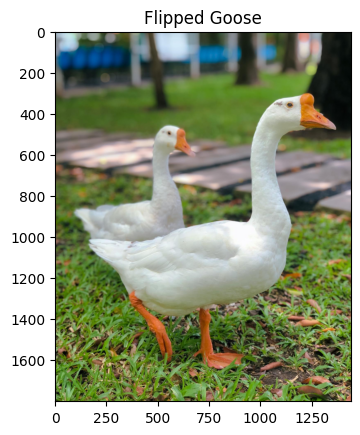

In [12]:
flipped_image_array = np.flip(image_array, axis=1)  # Flip horizontal

plt.imshow(flipped_image_array)
plt.title("Flipped Goose")
plt.show()

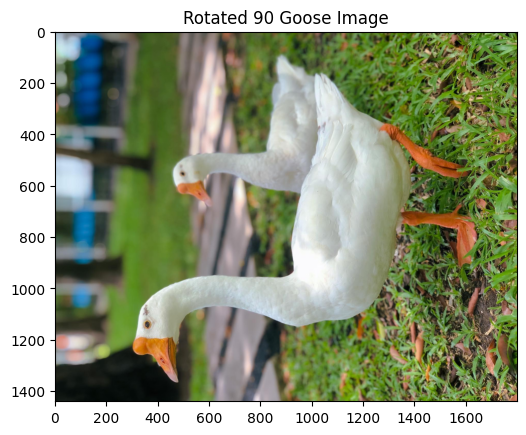

In [13]:
rotated_image = np.rot90(image_array)

plt.imshow(rotated_image)
plt.title("Rotated 90 Goose Image")
plt.show()

# เทรนโมเดลแยกรูปภาพ (Image Classification) ด้วย FastAI ภายในไม่กี่บรรทัด

เราจะมาแยกรูปภาพโดยใช้

In [14]:
import os
len(os.listdir("/content/Image_Comcamp38/train/img/duck")), len(os.listdir("/content/Image_Comcamp38/train/img/goose"))

(1040, 1532)

In [15]:
from fastai.vision.all import *

path = Path('/content/Image_Comcamp38/train/img')

# ทำการ Load ข้อมูลภายใน 1 บรรทัดด้วย FastAI Dataloaders
dls = ImageDataLoaders.from_folder(path,
                                   valid_pct=0.2,
                                   seed=42,
                                   label_func=lambda x: x.parent.name,
                                   item_tfms=Resize(224),
                                   batch_tfms=aug_transforms()
                                  )

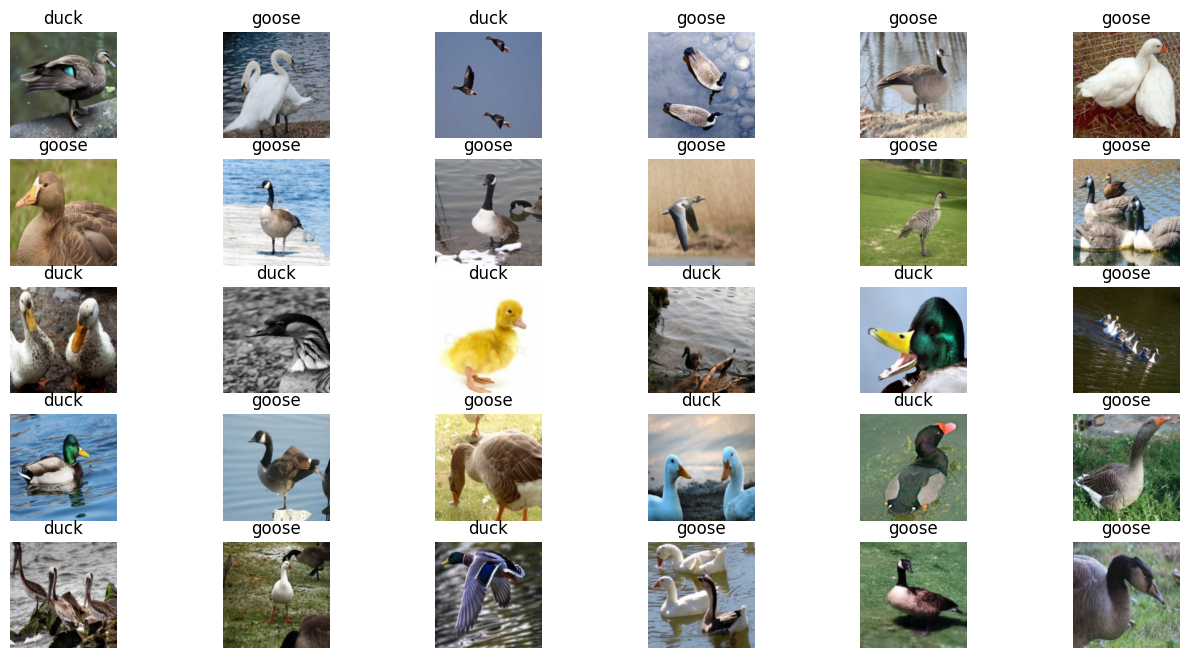

In [16]:
dls.show_batch(max_n=30, figsize=(16, 8)) # แสดงการสุ่มตัวอย่างข้อมูล 30 ตัวอย่าง

In [17]:
# เรียกใช้ Metrics
f1 = F1Score()
precision = Precision()
recall = Recall()

# ประกาศโมเดลที่จะเทรน ใช้เทคนิค Transfer-Learning กับโมเดล Resnet101
learn = cnn_learner(dls, resnet101, metrics=[accuracy, f1, precision, recall])

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet101-cd907fc2.pth" to /root/.cache/torch/hub/checkpoints/resnet101-cd907fc2.pth
100%|██████████| 171M/171M [00:01<00:00, 172MB/s]


เริ่มต้นการเทรน (Fine-Tuning) โมเดล CNN ภายใน 1 บรรทัด กันเลย !

In [18]:
learn.fine_tune(epochs=4)

epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,time
0,0.915966,0.634389,0.805447,0.844237,0.816265,0.874194,00:26


epoch,train_loss,valid_loss,accuracy,f1_score,precision_score,recall_score,time
0,0.633156,0.562379,0.803502,0.839428,0.827586,0.851613,00:34
1,0.539721,0.639090,0.807393,0.846986,0.813056,0.883871,00:36
2,0.423760,0.508511,0.836576,0.867925,0.846626,0.890323,00:38
3,0.320752,0.511603,0.830739,0.864275,0.836858,0.893548,00:37


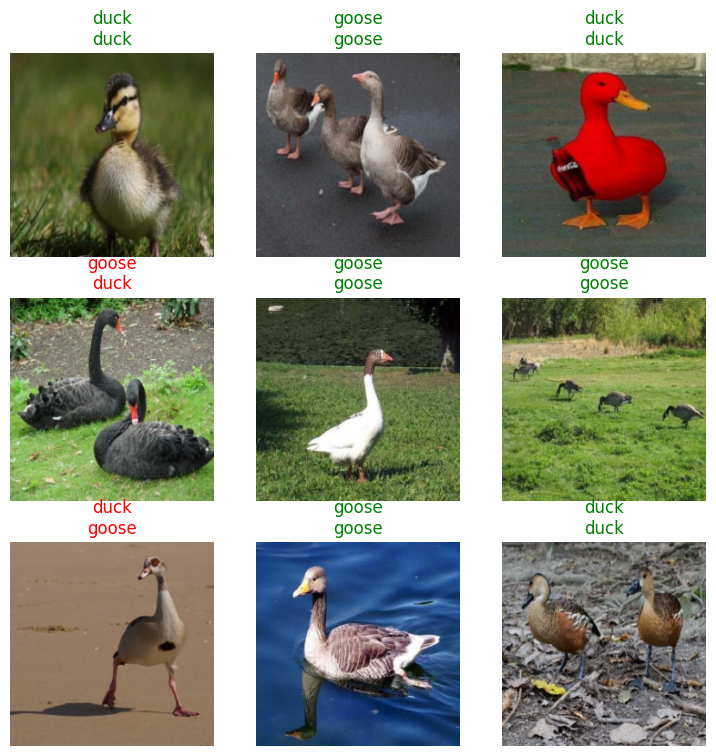

In [21]:
learn.save('duck_goose_model')
learn.show_results()

- ทำการทำนายข้อมูลจาก Test Set แสดง Metrics ต่างๆ ที่วัดผลว่าโมเดลทำได้ดีมากแค่ไหน
- แสดงผลการทำนายให้อยู่ในรูปแบบของ Confusion Matrix

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

preds, y_true = learn.get_preds()
y_pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(y_true, y_pred)

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))
print("Confusion Matrix:")
print(cm)

Accuracy: 0.830739299610895
Precision: 0.8368580060422961
Recall: 0.8935483870967742
F1 Score: 0.8642745709828393
Confusion Matrix:
[[150  54]
 [ 33 277]]


Plot Confusion Matrix ด้วย seaborn

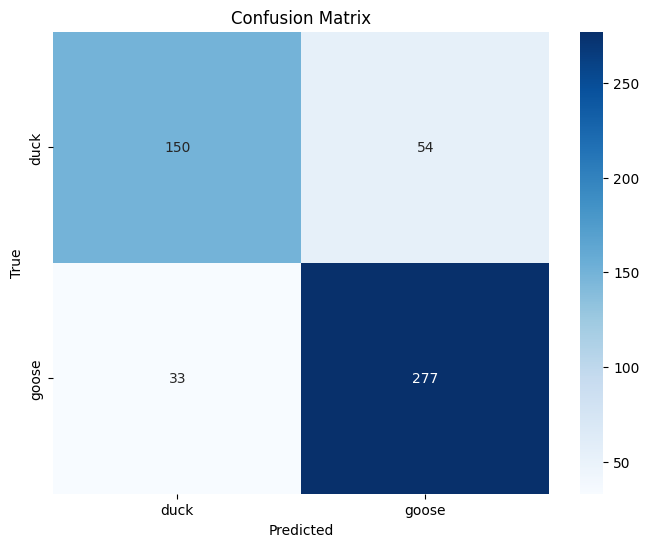

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=dls.vocab, yticklabels=dls.vocab)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

มาลองเอาห่าน มจธ. ให้โมเดลทายกันว่าโมเดลจะสามารถทายถูกหรือไม่

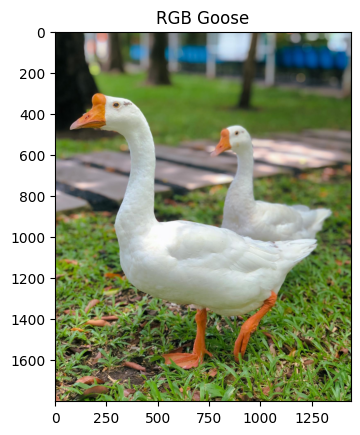

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

data_path = "/content/Image_Comcamp38"

# เปิดไฟล์รูปของห่านด้วย Pillow
image = Image.open(f"{data_path}/Goose.jpg")
image_array = np.array(image)

plt.imshow(image_array)
plt.title("RGB Goose")
plt.show()

In [25]:
# ส่งรูปภาพไปยังโมเดล เพื่อให้โมเดลพยากรณ์ว่าเป็น duck หรือ goose
prediction = learn.predict(image)
print("รูปนี้เป็นรูปของ:", prediction[0])
prediction

รูปนี้เป็นรูปของ: goose


('goose', tensor(1), tensor([0.1343, 0.8657]))